In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
import geopandas

import wbdata
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
df_sdg_country = pd.read_csv("SDG_COUNTRY.csv")
df_sdg_data_regional = pd.read_csv("SDG_DATA_REGIONAL.csv")
df_sdg_data_national = pd.read_csv("SDG_DATA_NATIONAL.csv")
df_sdg_label = pd.read_csv("SDG_LABEL.csv")
df_sdg_metadata = pd.read_csv("SDG_METADATA.csv")
df_sdg_region = pd.read_csv("SDG_REGION.csv")
location = pd.read_csv("location.txt", delimiter=",")

C:\Users\science\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
location.head(2)

,name,latitude,longitude
0,Afghanistan,33.93911,67.709953
1,Albania,41.153332,20.168331


In [4]:
allYears = np.sort(df_sdg_data_national['YEAR'].unique())
allYears

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [5]:
recentYears = allYears[-3:]
recentYears

array([2018, 2019, 2020], dtype=int64)

In [6]:
allCountries = np.sort(df_sdg_data_national['COUNTRY_ID'].unique())
allCountries

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALA', 'ALB', 'AND', 'ANT', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR',
       'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK',
       'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE',
       'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI',
       'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO',
       'FSM', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GLP',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUF', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU',
       'LUX', 'LVA',

In [7]:
df_sdg_data_national["INDICATOR_ID"] = df_sdg_data_national["INDICATOR_ID"].astype(str)
allIndicators = np.sort(df_sdg_data_national["INDICATOR_ID"].unique())
allIndicators

array(['ADMI.ENDOFLOWERSEC.MAT', 'ADMI.ENDOFLOWERSEC.READ',
       'ADMI.ENDOFPRIM.MAT', ..., 'YEARS.FC.COMP.1T3', 'YEARS.FC.FREE.02',
       'YEARS.FC.FREE.1T3'], dtype=object)

In [8]:
def subsetData(dataSet, yearList=recentYears, countryList=allCountries, indicatorList=allIndicators):
    aSubset = dataSet[(dataSet["YEAR"].isin(yearList)) &\
                     (dataSet["COUNTRY_ID"].isin(countryList)) &\
                     (dataSet["INDICATOR_ID"].isin(indicatorList))]
    
    return aSubset

In [9]:
subsetData(df_sdg_data_national).head(5)

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER
0,ADMI.ENDOFLOWERSEC.MAT,ABW,2019,0.0,NIL,NaN
1,ADMI.ENDOFLOWERSEC.MAT,AFG,2019,0.0,NIL,NaN
2,ADMI.ENDOFLOWERSEC.MAT,AGO,2019,0.0,NIL,NaN
3,ADMI.ENDOFLOWERSEC.MAT,AIA,2019,1.0,NaN,NaN
4,ADMI.ENDOFLOWERSEC.MAT,ALA,2019,0.0,NIL,NaN


In [10]:
#DataSet: national
defaultDataSubset = subsetData(df_sdg_data_national)
#metadata
defaultMetadataSubset = subsetData(df_sdg_metadata)
defaultMetadataSubset

,INDICATOR_ID,COUNTRY_ID,YEAR,TYPE,METADATA
8,AIDEDUC.LOWINCOMECOUNT,ARE,2018,Source:Data sources,Development Assistance Committee (DAC) of Orga...
17,AIDEDUC.LOWINCOMECOUNT,AUS,2018,Source:Data sources,Development Assistance Committee (DAC) of Orga...
26,AIDEDUC.LOWINCOMECOUNT,AUT,2018,Source:Data sources,Development Assistance Committee (DAC) of Orga...
27,AIDEDUC.LOWINCOMECOUNT,AUT,2019,Source:Data sources,Development Assistance Committee (DAC) of Orga...
36,AIDEDUC.LOWINCOMECOUNT,BEL,2018,Source:Data sources,Development Assistance Committee (DAC) of Orga...
...,...,...,...,...,...
394465,TSALARY.3,SVN,2019,Source:Data sources,source: OECD Education at a Glance
394467,TSALARY.3,SWE,2019,Source:Data sources,source: OECD Education at a Glance
394469,TSALARY.3,URY,2018,Source:Data sources,source: UIS data collection for teacher salari...
394471,TSALARY.3,USA,2019,Source:Data sources,source: OECD Education at a Glance


In [11]:
def addMetadata(dataSub, metaDataSet):
    
    dataSubsetWithMeta = pd.merge(dataSub, metaDataSet, on = ['YEAR', 'COUNTRY_ID', 'INDICATOR_ID'])
    
    return dataSubsetWithMeta

In [12]:
defaultSubsetWithSource = addMetadata(defaultDataSubset, df_sdg_metadata)
defaultSubsetWithSource.head(2)

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER,TYPE,METADATA
0,AIDEDUC.LOWINCOMECOUNT,ARE,2018,30.13651,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...
1,AIDEDUC.LOWINCOMECOUNT,AUS,2018,29.96298,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...


In [13]:
def addLabels(dataSetNoLabels, labelSet, keyVariable):
    
    dataSetWithLabels = pd.merge(dataSetNoLabels, labelSet, how="left", on = [keyVariable])
    return dataSetWithLabels

In [14]:
myDataSet_with_label = addLabels(defaultSubsetWithSource, df_sdg_label, "INDICATOR_ID")

In [15]:
myDataSet_with_label.head(5)

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER,TYPE,METADATA,INDICATOR_LABEL_EN
0,AIDEDUC.LOWINCOMECOUNT,ARE,2018,30.13651,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
1,AIDEDUC.LOWINCOMECOUNT,AUS,2018,29.96298,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
2,AIDEDUC.LOWINCOMECOUNT,AUT,2018,5.65086,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
3,AIDEDUC.LOWINCOMECOUNT,AUT,2019,5.85610,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
4,AIDEDUC.LOWINCOMECOUNT,BEL,2018,45.65187,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...


In [16]:
myDataSet_with_label.tail(5)

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER,TYPE,METADATA,INDICATOR_LABEL_EN
43763,TSALARY.3,SVN,2019,0.85576,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...
43764,TSALARY.3,SWE,2019,0.77873,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...
43765,TSALARY.3,URY,2018,0.75314,NaN,UIS_EST,Source:Data sources,source: UIS data collection for teacher salari...,Average teacher salary in upper secondary educ...
43766,TSALARY.3,USA,2019,0.62294,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...
43767,TSALARY.3,ZAF,2018,2.45582,NaN,UIS_EST,Source:Data sources,source: UIS data collection for teacher salari...,Average teacher salary in upper secondary educ...


In [17]:
myDataSet_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43768 entries, 0 to 43767
Data columns (total 9 columns):
INDICATOR_ID          43768 non-null object
COUNTRY_ID            43768 non-null object
YEAR                  43768 non-null int64
VALUE                 43768 non-null float64
MAGNITUDE             543 non-null object
QUALIFIER             148 non-null object
TYPE                  43768 non-null object
METADATA              43768 non-null object
INDICATOR_LABEL_EN    43687 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 3.3+ MB


In [18]:
myDataSet_with_label.describe()

,YEAR,VALUE
count,43768.000000,4.376800e+04
mean,2018.240975,4.490804e+04
std,0.431986,9.633324e+05
min,2018.000000,0.000000e+00
25%,2018.000000,6.490100e-01
50%,2018.000000,1.548620e+00
75%,2018.000000,4.633260e+01
max,2020.000000,8.381802e+07


In [19]:
# remove any duplicates
myDataSet_with_label.drop_duplicates()

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,MAGNITUDE,QUALIFIER,TYPE,METADATA,INDICATOR_LABEL_EN
0,AIDEDUC.LOWINCOMECOUNT,ARE,2018,30.13651,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
1,AIDEDUC.LOWINCOMECOUNT,AUS,2018,29.96298,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
2,AIDEDUC.LOWINCOMECOUNT,AUT,2018,5.65086,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
3,AIDEDUC.LOWINCOMECOUNT,AUT,2019,5.85610,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
4,AIDEDUC.LOWINCOMECOUNT,BEL,2018,45.65187,NaN,NaN,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
...,...,...,...,...,...,...,...,...,...
43763,TSALARY.3,SVN,2019,0.85576,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...
43764,TSALARY.3,SWE,2019,0.77873,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...
43765,TSALARY.3,URY,2018,0.75314,NaN,UIS_EST,Source:Data sources,source: UIS data collection for teacher salari...,Average teacher salary in upper secondary educ...
43766,TSALARY.3,USA,2019,0.62294,NaN,NaN,Source:Data sources,source: OECD Education at a Glance,Average teacher salary in upper secondary educ...


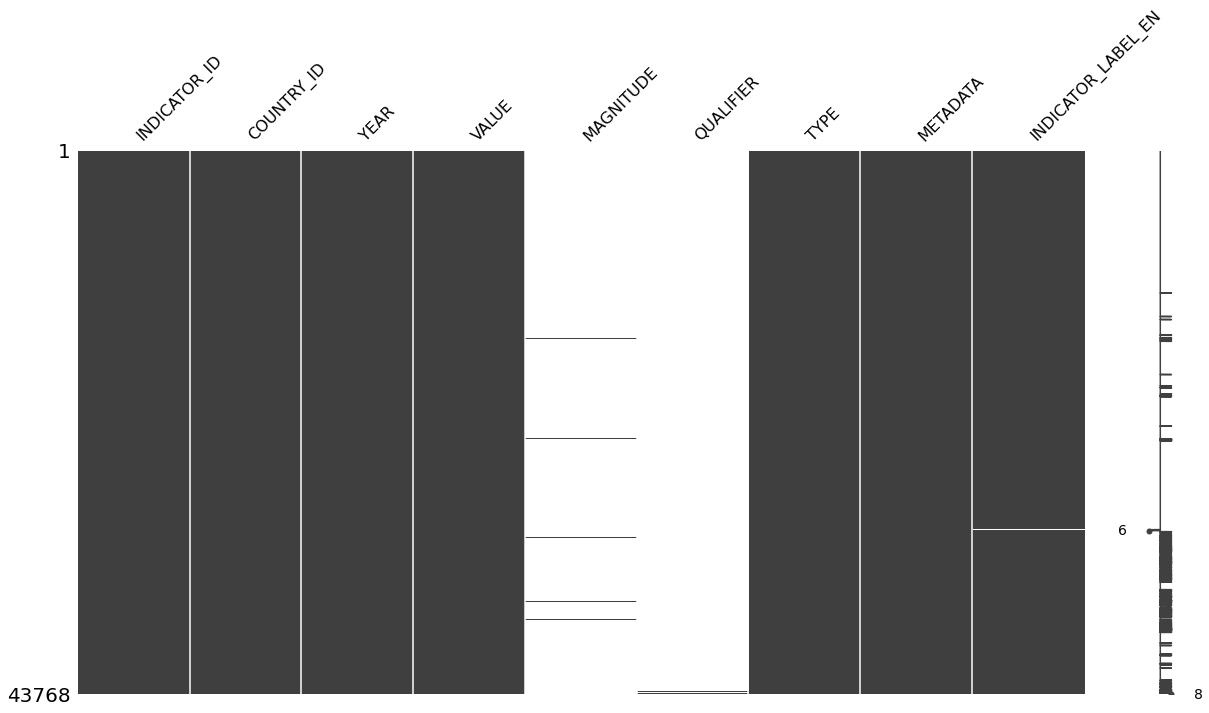

In [20]:
### Plot graphic of missing values
missingno.matrix(myDataSet_with_label, figsize = (20,10) )

In [21]:
# Magnitude and Qualifier can be dropped since they have to many missing points.

In [22]:
myDataSet_with_label = myDataSet_with_label.drop(['MAGNITUDE', 'QUALIFIER'], axis=1)
myDataSet_with_label.head(3)

,INDICATOR_ID,COUNTRY_ID,YEAR,VALUE,TYPE,METADATA,INDICATOR_LABEL_EN
0,AIDEDUC.LOWINCOMECOUNT,ARE,2018,30.13651,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
1,AIDEDUC.LOWINCOMECOUNT,AUS,2018,29.96298,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
2,AIDEDUC.LOWINCOMECOUNT,AUT,2018,5.65086,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...


In [23]:
myDataSet_with_label.isnull().sum()

INDICATOR_ID           0
COUNTRY_ID             0
YEAR                   0
VALUE                  0
TYPE                   0
METADATA               0
INDICATOR_LABEL_EN    81
dtype: int64

In [24]:
# now we need to solve the missing data points for INDICATOR_LABEL_EN

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [26]:
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [27]:
world.columns = ["pop_est", "continent", "name", "COUNTRY_ID", "gdp_md_est", "geometry"]

In [28]:
# merge world geo data with our dataset
df_merge = pd.merge(world, myDataSet_with_label, on="COUNTRY_ID")

In [29]:
df_merge.head(10)

,pop_est,continent,name,COUNTRY_ID,gdp_md_est,geometry,INDICATOR_ID,YEAR,VALUE,TYPE,METADATA,INDICATOR_LABEL_EN
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",ODAFLOW.VOLUMESCHOLARSHIP,2018,6.429019e+06,Source:Data sources,Official Development Assistance. Scholarships/...,Volume of official development assistance flow...
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",ODAFLOW.VOLUMESCHOLARSHIP,2019,4.395700e+06,Source:Data sources,Official Development Assistance. Scholarships/...,Volume of official development assistance flow...
2,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",N.ATTACKS,2018,0.000000e+00,Source:Data sources,Indicator is based on data compiled by the Glo...,"Number of attacks on students, personnel and i..."
3,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",N.ATTACKS,2019,0.000000e+00,Source:Data sources,Indicator is based on data compiled by the Glo...,"Number of attacks on students, personnel and i..."
4,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",ODAFLOW.VOLUMESCHOLARSHIP,2018,5.370945e+06,Source:Data sources,Official Development Assistance. Scholarships/...,Volume of official development assistance flow...
5,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",ODAFLOW.VOLUMESCHOLARSHIP,2019,7.444563e+06,Source:Data sources,Official Development Assistance. Scholarships/...,Volume of official development assistance flow...
6,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",RESDISADVPOP,2020,0.000000e+00,Source:Data sources,Total Score : Not-Equity-oriented; 1. Overall ...,NaN
7,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",AIDEDUC.LOWINCOMECOUNT,2018,5.836878e+01,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
8,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",AIDEDUC.LOWINCOMECOUNT,2019,3.647176e+01,Source:Data sources,Development Assistance Committee (DAC) of Orga...,Percentage of total aid to education allocated...
9,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",ESG.LOWERSEC,2019,2.800000e+01,Source:Data sources,"TIMSS; Ontario, Canada",Percentage of students in lower secondary show...


In [30]:
df_merge_loc = df_merge.merge(location, on="name").sort_values(by= "VALUE", ascending=False).reset_index()

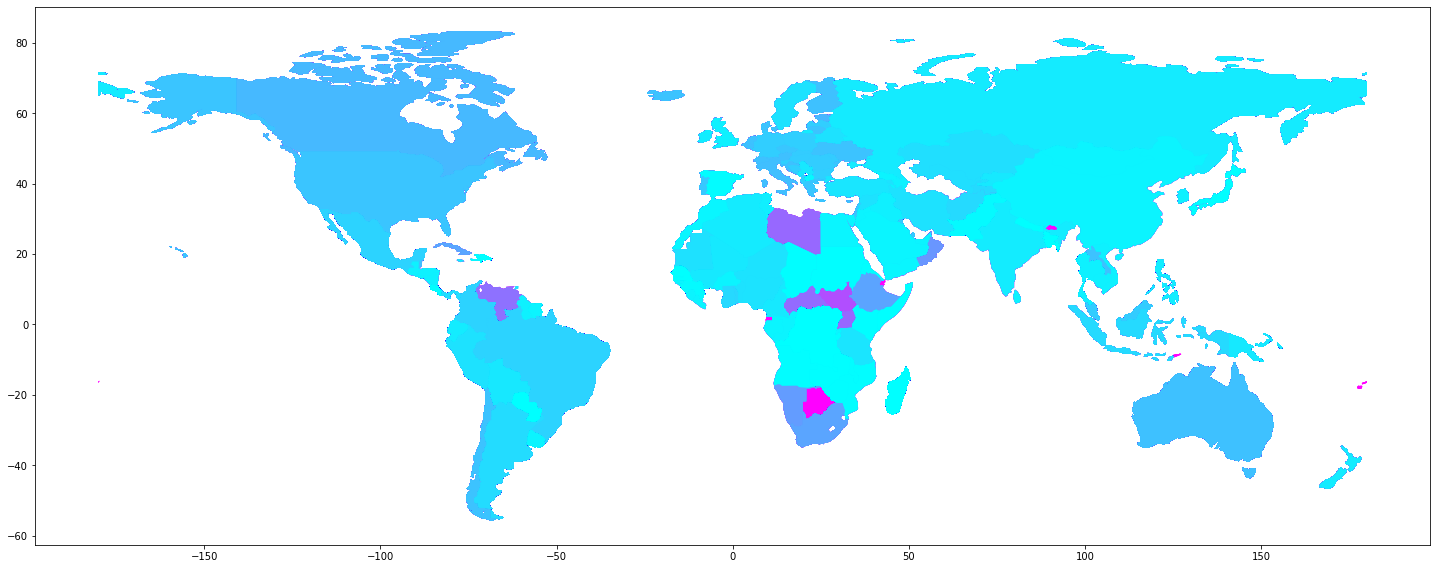

In [31]:
df_merge_loc.plot(figsize=(25,20), legend=True, cmap="cool_r")